In [1]:
# 학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM

from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm

In [3]:
face_FR =pd.read_csv("C:/Users/Home/Desktop/IQA/new_face_FR.csv")

In [4]:
face_FR

,WaDIQaM,WaDIQaM+VIFs,WaDIQaM+VIFs+NLPD,WaDIQaM+VIFs+NLPD+scc,WaDIQaM+VIFs+NLPD+scc+egras,WaDIQaM+VIFs+NLPD+scc+egras+DISTS,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim+ssim1,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim+ssim1+ssim2,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim+ssim1+ssim2+rmse,dist_sort,dist_rate,ref
0,4.086230,4.576206,4.592578,4.604210,4.591573,4.598158,4.585201,4.571589,4.566676,4.594347,4.584471,4.582097,4.580902,4.589505,4.591884,4.591884,1,1,0000.png
1,3.766834,4.069773,4.209350,4.203291,4.231603,4.293117,4.308334,4.261943,4.243278,4.272592,4.284643,4.294771,4.300504,4.300346,4.309043,4.309043,1,2,0000.png
2,2.410268,1.455342,1.685171,1.714405,1.716240,2.229668,2.190741,2.236789,2.233932,2.223592,2.194491,2.095815,2.079864,2.157509,2.207272,2.207272,1,3,0000.png
3,1.632316,1.319441,1.444840,1.461026,1.400324,1.875452,1.909864,1.931712,1.942175,2.026321,2.007921,2.014939,2.054493,2.061144,2.053860,2.053860,1,4,0000.png
4,1.412018,1.248878,1.303134,1.322053,1.263799,1.827113,1.837788,1.865081,1.895096,1.949582,1.956713,1.996126,2.051138,2.015733,1.991816,1.991816,1,5,0000.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,4.542479,4.609715,4.601306,4.608692,4.612846,4.608073,4.610218,4.597186,4.598026,4.593062,4.600896,4.606129,4.600182,4.604092,4.598493,4.598493,3,1,1703.png
17996,4.104001,2.494159,2.582581,2.750048,2.659905,3.108138,3.054824,3.080223,3.101220,3.150120,3.197236,3.084268,3.164347,3.190927,3.229854,3.229854,3,2,1703.png
17997,2.352484,1.327020,1.551424,1.558193,1.558209,1.953742,1.913244,1.924522,1.938336,1.972365,1.926440,1.920133,1.919464,1.934350,1.889047,1.889047,3,3,1703.png
17998,2.166850,1.189229,1.448524,1.532825,1.513996,1.931295,1.987145,2.017848,1.988885,2.014428,2.054400,2.053990,2.046744,2.064946,2.042238,2.042238,3,4,1703.png


In [94]:
face_FR['WaDIQaM+VIFs+NLPD+scc+egras']

0        4.591573
1        4.231603
2        1.716240
3        1.400324
4        1.263799
           ...   
17995    4.612846
17996    2.659905
17997    1.558209
17998    1.513996
17999    1.349216
Name: WaDIQaM+VIFs+NLPD+scc+egras, Length: 18000, dtype: float64

In [5]:
face_NR =pd.read_csv("C:/Users/Home/Desktop/IQA/NRIQA_df_ffhq_all.csv")
df=face_NR

In [7]:
face_NR.describe()

,CPBD,NIQE,BRISQUE,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DIST_SORT
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.298139,14.846185,40.104630,33.478082,49.838658,40.699544,42.527770,51.369212,47.470236,2.000000
std,0.217314,2.097335,25.079009,16.687329,12.070565,19.232739,16.298281,15.591187,14.112603,0.816519
min,0.000000,7.412000,-20.892000,7.150000,21.126000,-0.006000,-0.004000,19.481000,19.055000,1.000000
25%,0.087000,13.642000,21.433750,23.177000,39.213000,26.482750,31.316750,38.493750,35.822000,1.000000
50%,0.296000,14.725000,35.677500,29.713000,48.215500,37.273500,40.060500,48.291500,45.060500,2.000000
75%,0.481000,15.933000,56.682000,37.511250,59.315000,58.415250,57.619250,64.328250,60.075750,3.000000
max,0.854000,34.452000,106.623000,83.496000,81.948000,84.601000,74.752000,91.725000,76.856000,3.000000


In [14]:
face_NR[face_NR['BRISQUE']<0]

,CPBD,NIQE,BRISQUE,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DIST_SORT,DIST_RATE,DIST_IMG
4,0.611,7.479,-3.795,13.307,40.148,59.486,58.296,56.054,54.335,1,05.png,0000_01_05.png
90,0.595,11.303,-2.684,13.631,57.618,70.758,68.167,81.279,70.387,1,01.png,0007_01_01.png
241,0.763,9.384,-3.641,23.024,66.721,65.444,67.105,67.618,64.431,1,02.png,0021_01_02.png
275,0.522,14.229,-1.211,18.933,41.118,28.382,30.426,36.883,39.305,2,01.png,0023_02_01.png
280,0.522,14.229,-1.211,18.933,49.528,26.747,31.320,39.689,38.632,3,01.png,0023_03_01.png
...,...,...,...,...,...,...,...,...,...,...,...,...
17627,0.649,11.758,-20.892,14.658,59.314,34.681,40.839,41.944,42.661,1,03.png,1665_01_03.png
17672,0.681,11.330,-1.810,9.408,60.602,11.035,20.620,30.377,25.751,1,03.png,1674_01_03.png
17869,0.611,11.491,-0.264,12.137,35.614,2.102,6.088,37.099,25.024,1,05.png,1692_01_05.png
17962,0.681,11.330,-1.810,9.408,31.634,25.113,32.516,47.344,32.041,2,03.png,1701_02_03.png


In [22]:
display(face_NR[face_NR['WaDIQaM_LIVE']<=0])
len(face_NR[face_NR['WaDIQaM_LIVE']<=0])

,CPBD,NIQE,BRISQUE,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DIST_SORT,DIST_RATE,DIST_IMG
17,0.395,12.797,34.406,33.647,54.312,-0.003,0.049,40.054,34.735,1,03.png,0001_01_03.png
769,0.059,17.153,51.773,41.699,40.736,-0.005,0.001,30.061,28.195,1,05.png,0075_01_05.png
960,0.000,15.964,93.579,79.416,72.098,-0.004,0.203,30.186,30.327,1,01.png,0099_01_01.png
2131,0.426,12.854,24.302,18.951,68.086,-0.001,-0.000,33.865,33.257,1,02.png,0231_01_02.png
2337,0.296,16.381,36.692,25.413,47.169,-0.001,9.589,43.001,36.928,3,03.png,0246_03_03.png
3311,0.017,14.851,66.822,47.245,54.839,-0.004,0.215,30.302,30.375,3,02.png,0332_03_02.png
3874,0.015,15.122,68.521,60.227,36.665,-0.001,9.520,42.025,36.718,1,05.png,0387_01_05.png
4322,0.000,18.391,95.748,77.225,48.582,-0.002,-0.002,29.749,29.639,1,03.png,0422_01_03.png
4453,0.375,13.887,20.434,25.435,66.835,-0.003,0.319,39.376,37.593,3,04.png,0435_03_04.png
5007,0.333,13.900,25.574,30.222,55.038,-0.004,0.001,34.790,31.862,3,03.png,0492_03_03.png


45

In [23]:
display(face_NR[face_NR['DIQaM_LIVE']<=0])
len(face_NR[face_NR['DIQaM_LIVE']<=0])

,CPBD,NIQE,BRISQUE,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DIST_SORT,DIST_RATE,DIST_IMG
2131,0.426,12.854,24.302,18.951,68.086,-0.001,-0.000,33.865,33.257,1,02.png,0231_01_02.png
4322,0.000,18.391,95.748,77.225,48.582,-0.002,-0.002,29.749,29.639,1,03.png,0422_01_03.png
5368,0.067,14.368,59.859,33.308,42.664,-0.004,-0.000,29.047,28.065,3,04.png,0523_03_04.png
5974,0.013,15.136,66.128,59.934,41.318,0.106,-0.002,33.385,32.978,1,05.png,0577_01_05.png
6251,0.524,13.371,14.960,23.914,63.804,-0.002,-0.000,26.101,27.202,3,02.png,0605_03_02.png
9300,0.000,15.562,91.885,80.525,77.039,13.776,-0.000,26.788,26.066,1,01.png,0903_01_01.png
9453,0.584,12.973,12.602,18.871,41.250,-0.001,-0.002,26.424,20.461,1,04.png,0917_01_04.png
11341,0.059,15.274,67.962,43.684,72.417,-0.004,-0.001,34.331,31.816,1,02.png,1090_01_02.png
11908,0.226,13.635,36.025,27.729,77.372,-0.001,-0.004,26.100,20.529,3,04.png,1139_03_04.png
12347,0.412,16.386,21.409,21.639,57.370,-0.002,-0.002,26.086,27.243,1,03.png,1184_01_03.png


18

In [230]:
x = df.drop(columns=['DIST_SORT', 'DIST_RATE','DIST_IMG'])
y = face_FR['WaDIQaM+VIFs+NLPD+scc+egras']

In [165]:
# columns = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
# columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
# columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID']
columns = ['CPBD', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID']

In [103]:
x_train = x[300:]
x_val = x[:300]
y_train = y[300:]
y_val = y[:300]

In [104]:
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(x_train, y_train)
reg2.fit(x_train, y_train)
reg3.fit(x_train, y_train)
reg4.fit(x_train, y_train)
reg5.fit(x_train, y_train)

pred_train = reg.predict(x_train)
pred_train2 = reg2.predict(x_train)
pred_train3 = reg3.predict(x_train)
pred_train4 = reg4.predict(x_train)
pred_train5 = reg5.predict(x_train)

pred_val = reg.predict(x_val)
pred_val2 = reg2.predict(x_val)
pred_val3 = reg3.predict(x_val)
pred_val4 = reg4.predict(x_val)
pred_val5 = reg5.predict(x_val)

In [105]:
mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print("Linear Regression, train/val\t = %.4f, %.4f" % (mse_train, mse_val))
print("Lasso, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))
print("Ridge, train/val\t\t = %.4f, %.4f" % (mse_train3, mse_val3))
print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train4, mse_val4))
print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train5, mse_val5))

Linear Regression, train/val	 = 1.1111, 1.1455
Lasso, train/val		 = 1.1264, 1.1672
Ridge, train/val		 = 1.1111, 1.1455
XGBoost, train/val		 = 0.5195, 1.0402
LightGBM, train/val		 = 0.7662, 0.9609


In [107]:
result_train = pd.DataFrame({"mos": y_train, 
                             "reg1": pred_train, 
                             "reg2": pred_train2, 
                             "reg3": pred_train3, 
                             "reg4": pred_train4, 
                             "reg5": pred_train5})
result_val = pd.DataFrame({"mos": y_val, 
                           "reg1": pred_val, 
                           "reg2": pred_val2, 
                           "reg3": pred_val3, 
                           "reg4": pred_val4, 
                           "reg5": pred_val5})
result_all = pd.DataFrame({"mos": y, 
                           "reg1": reg.predict(x), 
                           "reg2": reg2.predict(x), 
                           "reg3": reg3.predict(x), 
                           "reg4": reg4.predict(x), 
                           "reg5": reg5.predict(x)})

In [108]:
rocc_train = result_train.corr(method="spearman")
rocc_val = result_val.corr(method="spearman")
rocc_all = result_all.corr(method="spearman")
lcc_train = result_train.corr(method="pearson")
lcc_val = result_val.corr(method="pearson")
lcc_all = result_all.corr(method="pearson")

In [109]:
# train
print("Linear Regression, ROCC/LCC\t = %.4f, %.4f" % (rocc_train.loc["mos", "reg1"], lcc_train.loc["mos", "reg1"]))
print("Lasso, ROCC/LCC\t\t\t = %.4f, %.4f" % (rocc_train.loc["mos", "reg2"], lcc_train.loc["mos", "reg2"]))
print("Ridge, ROCC/LCC\t\t\t = %.4f, %.4f" % (rocc_train.loc["mos", "reg3"], lcc_train.loc["mos", "reg3"]))
print("XGBoost, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_train.loc["mos", "reg4"], lcc_train.loc["mos", "reg4"]))
print("LightGBM, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_train.loc["mos", "reg5"], lcc_train.loc["mos", "reg5"]))

Linear Regression, ROCC/LCC	 = 0.4423, 0.4506
Lasso, ROCC/LCC			 = 0.4418, 0.4447
Ridge, ROCC/LCC			 = 0.4423, 0.4506
XGBoost, ROCC/LCC		 = 0.7390, 0.8084
LightGBM, ROCC/LCC		 = 0.6333, 0.6814


In [110]:
# val
print("Linear Regression, ROCC/LCC\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"]))
print("Lasso, ROCC/LCC\t\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]))
print("Ridge, ROCC/LCC\t\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg3"], lcc_val.loc["mos", "reg3"]))
print("XGBoost, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg4"], lcc_val.loc["mos", "reg4"]))
print("LightGBM, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg5"], lcc_val.loc["mos", "reg5"]))

Linear Regression, ROCC/LCC	 = 0.4740, 0.4498
Lasso, ROCC/LCC			 = 0.4634, 0.4383
Ridge, ROCC/LCC			 = 0.4740, 0.4498
XGBoost, ROCC/LCC		 = 0.5314, 0.5267
LightGBM, ROCC/LCC		 = 0.5871, 0.5760


In [111]:
# 전체
print("Linear Regression, ROCC/LCC\t = %.4f, %.4f" % (rocc_all.loc["mos", "reg1"], lcc_all.loc["mos", "reg1"]))
print("Lasso, ROCC/LCC\t\t\t = %.4f, %.4f" % (rocc_all.loc["mos", "reg2"], lcc_all.loc["mos", "reg2"]))
print("Ridge, ROCC/LCC\t\t\t = %.4f, %.4f" % (rocc_all.loc["mos", "reg3"], lcc_all.loc["mos", "reg3"]))
print("XGBoost, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_all.loc["mos", "reg4"], lcc_all.loc["mos", "reg4"]))
print("LightGBM, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_all.loc["mos", "reg5"], lcc_all.loc["mos", "reg5"]))

Linear Regression, ROCC/LCC	 = 0.4428, 0.4506
Lasso, ROCC/LCC			 = 0.4421, 0.4446
Ridge, ROCC/LCC			 = 0.4428, 0.4506
XGBoost, ROCC/LCC		 = 0.7358, 0.8040
LightGBM, ROCC/LCC		 = 0.6325, 0.6797


<AxesSubplot:ylabel='WaDIQaM+VIFs+NLPD+scc+egras'>

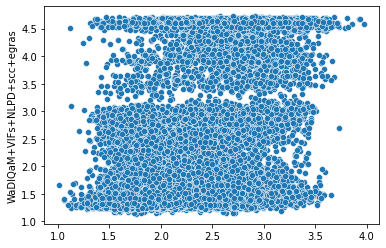

In [118]:
sns.scatterplot(x=reg.predict(x), y=y)

<AxesSubplot:ylabel='WaDIQaM+VIFs+NLPD+scc+egras'>

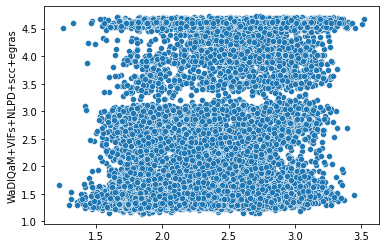

In [120]:
sns.scatterplot(x=reg2.predict(x), y=y)

<AxesSubplot:ylabel='WaDIQaM+VIFs+NLPD+scc+egras'>

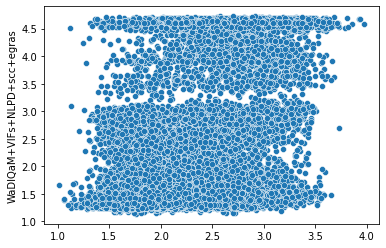

In [121]:
sns.scatterplot(x=reg3.predict(x), y=y)

<AxesSubplot:ylabel='WaDIQaM+VIFs+NLPD+scc+egras'>

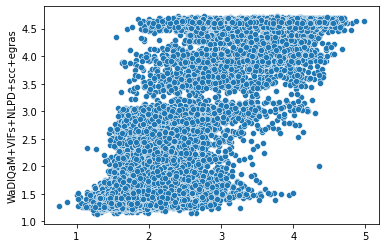

In [122]:
sns.scatterplot(x=reg4.predict(x), y=y)

<AxesSubplot:ylabel='WaDIQaM+VIFs+NLPD+scc+egras'>

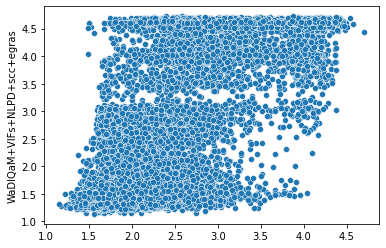

In [123]:
sns.scatterplot(x=reg5.predict(x), y=y)

In [126]:
reg4.feature_importances_

array([0.05158848, 0.06154203, 0.06652725, 0.17573225, 0.2807522 ,
       0.06629281, 0.14278334, 0.06887826, 0.08590332], dtype=float32)

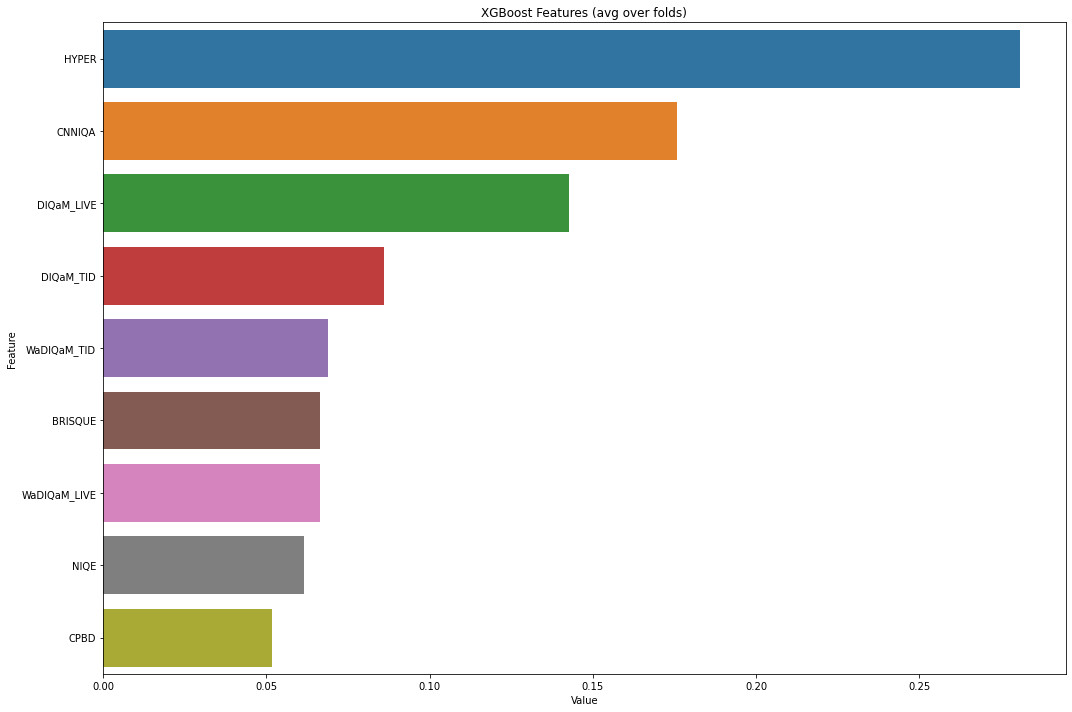

In [130]:
feature_imp = pd.DataFrame(sorted(zip(reg4.feature_importances_,x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

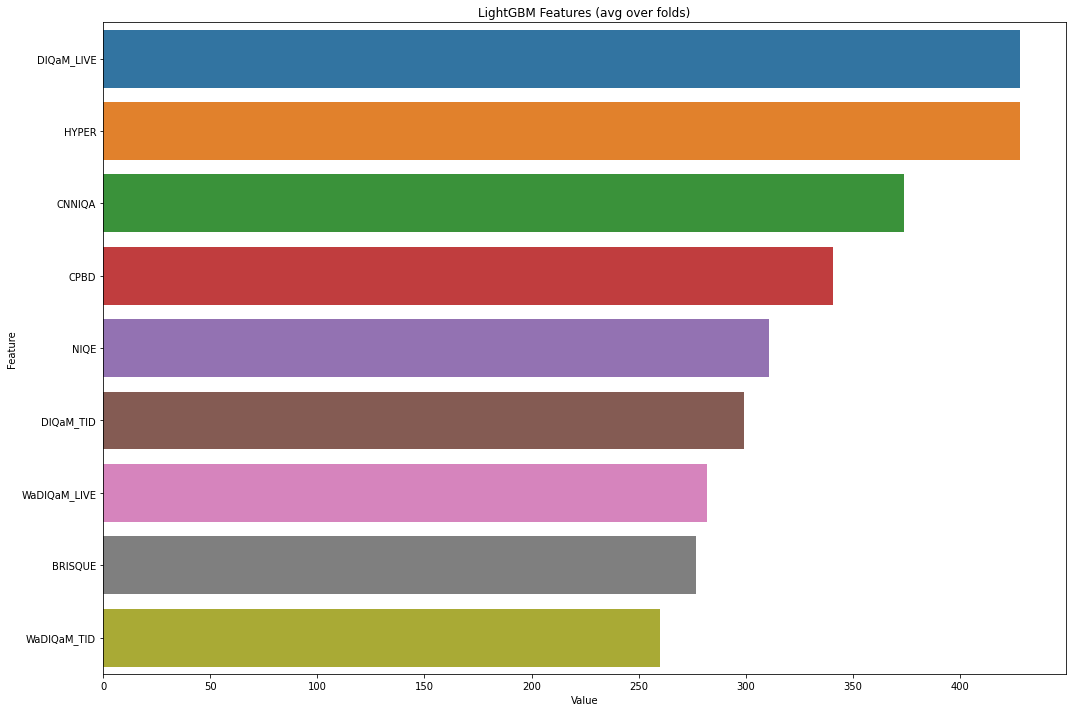

In [129]:
feature_imp = pd.DataFrame(sorted(zip(reg5.feature_importances_,x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

### data 5개 썻을경우

In [132]:
hist = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 1.3213, 1.5558
LightGBM, train/val		 = 1.3618, 1.4744
IQAs = ['CPBD', 'NIQE']
XGBoost, train/val		 = 1.0470, 1.4940
LightGBM, train/val		 = 1.2692, 1.4854
IQAs = ['CPBD', 'NIQE', 'BRISQUE']
XGBoost, train/val		 = 1.0092, 1.5398
LightGBM, train/val		 = 1.2195, 1.4743
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.9396, 1.5329
LightGBM, train/val		 = 1.1926, 1.4437
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.6291, 1.1308
LightGBM, train/val		 = 0.8587, 1.0701
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE']
XGBoost, train/val		 = 0.5774, 1.1427
LightGBM, train/val		 = 0.8178, 1.0415
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.5425, 1.0547
LightGBM, train/val		 = 0.7865, 0.9748
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.5295, 1.0

In [149]:
hist = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 1.3213, 1.5558
LightGBM, train/val		 = 1.3618, 1.4744
IQAs = ['CPBD', 'BRISQUE']
XGBoost, train/val		 = 1.0617, 1.6061
LightGBM, train/val		 = 1.2706, 1.4548
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 1.0029, 1.5345
LightGBM, train/val		 = 1.2224, 1.4214
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.6728, 1.0948
LightGBM, train/val		 = 0.8806, 1.0749
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE']
XGBoost, train/val		 = 0.5983, 1.1590
LightGBM, train/val		 = 0.8333, 1.0335
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.5683, 1.0202
LightGBM, train/val		 = 0.7995, 0.9598
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.5603, 1.0759
LightGBM, train/val		 = 0.7828, 0.9684
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
XG

In [155]:
hist = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 1.3213, 1.5558
LightGBM, train/val		 = 1.3618, 1.4744
IQAs = ['CPBD', 'BRISQUE']
XGBoost, train/val		 = 1.0617, 1.6061
LightGBM, train/val		 = 1.2706, 1.4548
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 1.0029, 1.5345
LightGBM, train/val		 = 1.2224, 1.4214
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.6728, 1.0948
LightGBM, train/val		 = 0.8806, 1.0749
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.5886, 1.0445
LightGBM, train/val		 = 0.8092, 0.9760
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.5635, 1.0763
LightGBM, train/val		 = 0.7979, 0.9538


In [166]:
hist4 = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist4.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 1.3213, 1.5558
LightGBM, train/val		 = 1.3618, 1.4744
IQAs = ['CPBD', 'CNNIQA']
XGBoost, train/val		 = 1.0654, 1.4801
LightGBM, train/val		 = 1.2609, 1.4419
IQAs = ['CPBD', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.7048, 1.1225
LightGBM, train/val		 = 0.9041, 1.0635
IQAs = ['CPBD', 'CNNIQA', 'HYPER', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.6022, 1.0479
LightGBM, train/val		 = 0.8242, 0.9698
IQAs = ['CPBD', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.5965, 1.0533
LightGBM, train/val		 = 0.8107, 0.9745


In [135]:
hist = pd.DataFrame(hist)

In [150]:
hist2 = pd.DataFrame(hist)

In [156]:
hist3 = pd.DataFrame(hist)

In [140]:
hist

,0,1,2,3,4
0,1,1.321293,1.555839,1.361803,1.474430
1,2,1.047010,1.493975,1.269169,1.485415
2,3,1.009222,1.539796,1.219519,1.474312
3,4,0.939621,1.532918,1.192579,1.443667
4,5,0.629086,1.130756,0.858736,1.070106
5,6,0.577430,1.142670,0.817816,1.041456
6,7,0.542462,1.054742,0.786486,0.974805
7,8,0.529456,1.014381,0.774364,0.976358
8,9,0.519527,1.040165,0.766172,0.960880


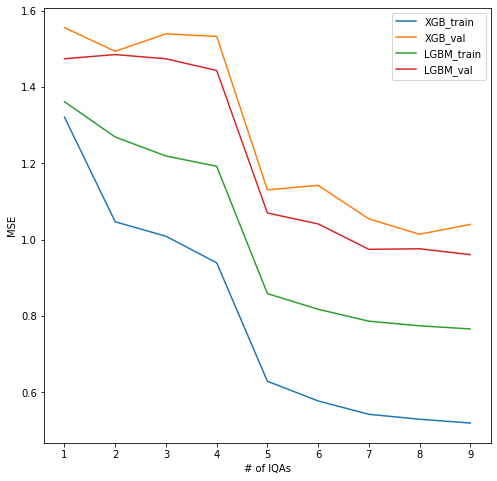

In [138]:
plt.figure(figsize=(8, 8))
plt.plot(hist[0], hist[1])
plt.plot(hist[0], hist[2])
plt.plot(hist[0], hist[3])
plt.plot(hist[0], hist[4])
plt.legend(['XGB_train', 'XGB_val', 'LGBM_train', 'LGBM_val'])
plt.xlabel('# of IQAs')
plt.ylabel('MSE')
plt.show()

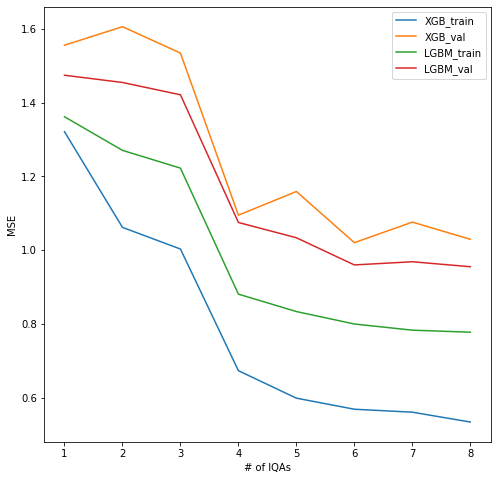

In [151]:
plt.figure(figsize=(8, 8))
plt.plot(hist2[0], hist2[1])
plt.plot(hist2[0], hist2[2])
plt.plot(hist2[0], hist2[3])
plt.plot(hist2[0], hist2[4])
plt.legend(['XGB_train', 'XGB_val', 'LGBM_train', 'LGBM_val'])
plt.xlabel('# of IQAs')
plt.ylabel('MSE')
plt.show()

In [158]:
hist3

,0,1,2,3,4
0,1,1.321293,1.555839,1.361803,1.474430
1,2,1.061685,1.606131,1.270625,1.454776
2,3,1.002915,1.534529,1.222386,1.421392
3,4,0.672824,1.094756,0.880560,1.074945
4,5,0.588616,1.044542,0.809244,0.976048
5,6,0.563507,1.076344,0.797876,0.953810


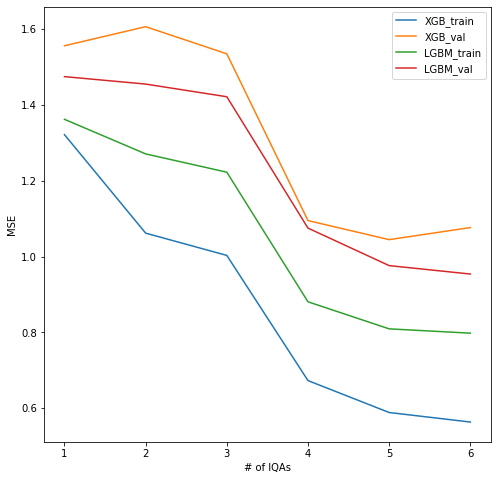

In [160]:
plt.figure(figsize=(8, 8))
plt.plot(hist3[0], hist3[1])
plt.plot(hist3[0], hist3[2])
plt.plot(hist3[0], hist3[3])
plt.plot(hist3[0], hist3[4])
plt.legend(['XGB_train', 'XGB_val', 'LGBM_train', 'LGBM_val'])
plt.xlabel('# of IQAs')
plt.ylabel('MSE')
plt.show()

In [145]:
hist_cor = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)


    result_val = pd.DataFrame({"mos": y_val, 
                               "reg1": pred_val1, 
                               "reg2": pred_val2})

    rocc_val = abs(result_val.corr(method="spearman"))
    lcc_val = abs(result_val.corr(method="pearson"))

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"]))
    print("LightGBM, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]))

    hist_cor.append([i+1, rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"], rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]])

IQAs = ['CPBD']
XGBoost, ROCC/LCC		 = 0.0838, 0.1274
LightGBM, ROCC/LCC		 = 0.0067, 0.0295
IQAs = ['CPBD', 'NIQE']
XGBoost, ROCC/LCC		 = 0.0598, 0.0517
LightGBM, ROCC/LCC		 = 0.0402, 0.0291
IQAs = ['CPBD', 'NIQE', 'BRISQUE']
XGBoost, ROCC/LCC		 = 0.0196, 0.0163
LightGBM, ROCC/LCC		 = 0.0338, 0.0081
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA']
XGBoost, ROCC/LCC		 = 0.0267, 0.0394
LightGBM, ROCC/LCC		 = 0.0818, 0.0816
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, ROCC/LCC		 = 0.4689, 0.4667
LightGBM, ROCC/LCC		 = 0.5010, 0.5046
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE']
XGBoost, ROCC/LCC		 = 0.4951, 0.4660
LightGBM, ROCC/LCC		 = 0.5300, 0.5240
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE']
XGBoost, ROCC/LCC		 = 0.5189, 0.5190
LightGBM, ROCC/LCC		 = 0.5565, 0.5668
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, ROCC/LCC		 = 0.5532, 0.5417
LightGBM, R

In [146]:
hist_cor = pd.DataFrame(hist_cor)

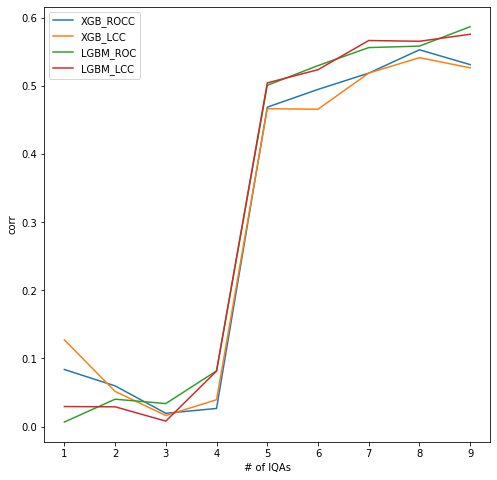

In [147]:
plt.figure(figsize=(8, 8))
plt.plot(hist_cor[0], hist_cor[1])
plt.plot(hist_cor[0], hist_cor[2])
plt.plot(hist_cor[0], hist_cor[3])
plt.plot(hist_cor[0], hist_cor[4])
plt.legend(['XGB_ROCC', 'XGB_LCC', 'LGBM_ROC', 'LGBM_LCC'])
plt.xlabel('# of IQAs')
plt.ylabel('corr')
plt.show()

### data16개썻을경우  
columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID'] 때가 가장 좋음

In [168]:
x = df.drop(columns=['DIST_SORT', 'DIST_RATE','DIST_IMG'])
y = face_FR['WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim+ssim1+ssim2+rmse']

In [196]:
#columns = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
#columns = ['CPBD', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID']
#columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID']
columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'DIQaM_TID']


In [177]:
hist16_9 = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist16_9.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 0.9112, 1.0639
LightGBM, train/val		 = 0.9394, 1.0128
IQAs = ['CPBD', 'NIQE']
XGBoost, train/val		 = 0.7200, 1.0325
LightGBM, train/val		 = 0.8738, 1.0163
IQAs = ['CPBD', 'NIQE', 'BRISQUE']
XGBoost, train/val		 = 0.6918, 1.0880
LightGBM, train/val		 = 0.8420, 1.0243
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.6600, 1.1026
LightGBM, train/val		 = 0.8236, 0.9944
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.4473, 0.7869
LightGBM, train/val		 = 0.6050, 0.7488
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE']
XGBoost, train/val		 = 0.4214, 0.7951
LightGBM, train/val		 = 0.5803, 0.7501
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.3869, 0.7416
LightGBM, train/val		 = 0.5604, 0.6868
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.3831, 0.7

In [197]:
hist16_6 = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist16_6.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 0.9112, 1.0639
LightGBM, train/val		 = 0.9394, 1.0128
IQAs = ['CPBD', 'BRISQUE']
XGBoost, train/val		 = 0.7359, 1.1313
LightGBM, train/val		 = 0.8761, 1.0066
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.7034, 1.0585
LightGBM, train/val		 = 0.8452, 0.9696
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.4625, 0.7908
LightGBM, train/val		 = 0.6199, 0.7520
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.4280, 0.7277
LightGBM, train/val		 = 0.5742, 0.7105
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'DIQaM_TID']
XGBoost, train/val		 = 0.3981, 0.7534
LightGBM, train/val		 = 0.5684, 0.6870


In [190]:
hist = pd.DataFrame(hist16_6)

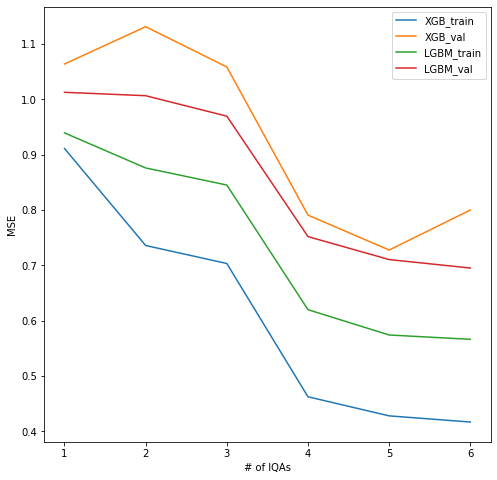

In [191]:
plt.figure(figsize=(8, 8))
plt.plot(hist[0], hist[1])
plt.plot(hist[0], hist[2])
plt.plot(hist[0], hist[3])
plt.plot(hist[0], hist[4])
plt.legend(['XGB_train', 'XGB_val', 'LGBM_train', 'LGBM_val'])
plt.xlabel('# of IQAs')
plt.ylabel('MSE')
plt.show()

In [192]:
hist_cor = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)


    result_val = pd.DataFrame({"mos": y_val, 
                               "reg1": pred_val1, 
                               "reg2": pred_val2})

    rocc_val = abs(result_val.corr(method="spearman"))
    lcc_val = abs(result_val.corr(method="pearson"))

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"]))
    print("LightGBM, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]))

    hist_cor.append([i+1, rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"], rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]])

IQAs = ['CPBD']
XGBoost, ROCC/LCC		 = 0.0849, 0.1260
LightGBM, ROCC/LCC		 = 0.0223, 0.0314
IQAs = ['CPBD', 'BRISQUE']
XGBoost, ROCC/LCC		 = 0.0930, 0.0945
LightGBM, ROCC/LCC		 = 0.0153, 0.0192
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, ROCC/LCC		 = 0.0436, 0.0241
LightGBM, ROCC/LCC		 = 0.0884, 0.1339
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, ROCC/LCC		 = 0.3279, 0.4570
LightGBM, ROCC/LCC		 = 0.3914, 0.4874
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE']
XGBoost, ROCC/LCC		 = 0.4061, 0.5136
LightGBM, ROCC/LCC		 = 0.4193, 0.5280
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'DIQaM_TID']
XGBoost, ROCC/LCC		 = 0.3980, 0.4931
LightGBM, ROCC/LCC		 = 0.4299, 0.5507


In [193]:
hist_cor = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)


    result_val = pd.DataFrame({"mos": y_val, 
                               "reg1": pred_val1, 
                               "reg2": pred_val2})

    rocc_val = abs(result_val.corr(method="spearman"))
    lcc_val = abs(result_val.corr(method="pearson"))

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"]))
    print("LightGBM, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]))

    hist_cor.append([i+1, rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"], rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]])

IQAs = ['CPBD']
XGBoost, ROCC/LCC		 = 0.0849, 0.1260
LightGBM, ROCC/LCC		 = 0.0223, 0.0314
IQAs = ['CPBD', 'BRISQUE']
XGBoost, ROCC/LCC		 = 0.0930, 0.0945
LightGBM, ROCC/LCC		 = 0.0153, 0.0192
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, ROCC/LCC		 = 0.0436, 0.0241
LightGBM, ROCC/LCC		 = 0.0884, 0.1339
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, ROCC/LCC		 = 0.3279, 0.4570
LightGBM, ROCC/LCC		 = 0.3914, 0.4874
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE']
XGBoost, ROCC/LCC		 = 0.4061, 0.5136
LightGBM, ROCC/LCC		 = 0.4193, 0.5280
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'DIQaM_TID']
XGBoost, ROCC/LCC		 = 0.3980, 0.4931
LightGBM, ROCC/LCC		 = 0.4299, 0.5507


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [198]:
trainX = x[300:]
testX = x[:300]
y = y[300:]


In [199]:

print(trainX.shape, testX.shape, y.shape)

(17700, 6) (300, 6) (17700,)


In [202]:
feature_reducing = "feature_importance"

In [211]:
# 1. correlation

# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

def find_feature_importance(X, model, show_plot):

    feat_names = X.columns.values
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()
    
    important_features = X.columns[importances >= 0.005]
    return important_features
    
def apply_PCA(X, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(15,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)
        
        
         

    return pca_090, X_train_pca_df

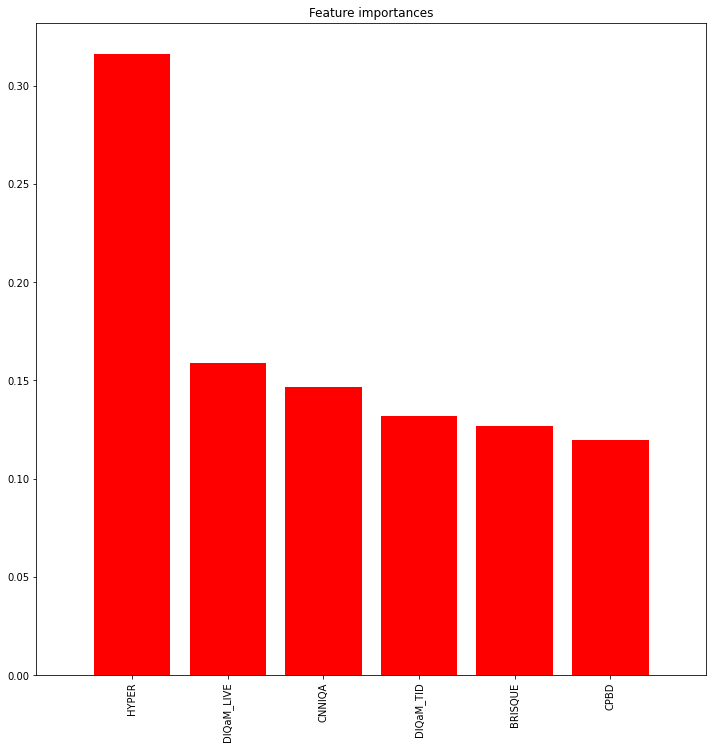

(17700, 6)


In [205]:
# PCA 적용
if feature_reducing == "correlation":
    threshold = 0.7
    correlated_features = remove_collinearity(trainX, threshold)
    correlated_features = set(correlated_features) # 중복 제거
    print("%d Correlation features over %.2f" % (len(correlated_features), threshold))
    
    X = trainX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    show_plot = True
    model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
    model.fit(trainX, y)
    important_features = find_feature_importance(trainX, model, show_plot)
    X = trainX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    show_plot = True
    pca_model, X = apply_PCA(trainX, show_plot)
    print(X.shape)

In [216]:
important_features

Index(['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'DIQaM_TID'], dtype='object')

In [212]:
feature_reducing = "PCA"

(17700, 3)


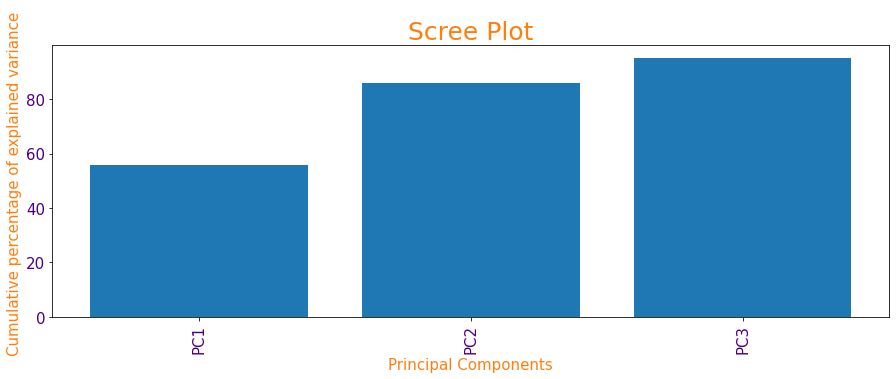

,PC1,PC2,PC3
0,-38.660419,-23.155310,-4.051653
1,-0.741671,-16.646363,-7.534563
2,-10.231130,-21.848522,-7.644008
3,70.405399,-22.204125,-13.680792
4,72.152615,3.803466,-13.027089
...,...,...,...
17695,0.142282,12.285294,-14.683809
17696,2.121149,15.843991,4.025691
17697,7.575321,14.361455,3.661482
17698,-28.353542,22.203087,8.496247


(17700, 3)


In [213]:
# PCA 적용
if feature_reducing == "correlation":
    threshold = 0.7
    correlated_features = remove_collinearity(trainX, threshold)
    correlated_features = set(correlated_features) # 중복 제거
    print("%d Correlation features over %.2f" % (len(correlated_features), threshold))
    
    X = trainX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    show_plot = True
    model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
    model.fit(trainX, y)
    important_features = find_feature_importance(trainX, model, show_plot)
    X = trainX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    show_plot = True
    pca_model, X = apply_PCA(trainX, show_plot)
    print(X.shape)

In [208]:
feature_reducing = "correlation"

In [209]:
# PCA 적용
if feature_reducing == "correlation":
    threshold = 0.7
    correlated_features = remove_collinearity(trainX, threshold)
    correlated_features = set(correlated_features) # 중복 제거
    print("%d Correlation features over %.2f" % (len(correlated_features), threshold))
    
    X = trainX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    show_plot = True
    model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
    model.fit(trainX, y)
    important_features = find_feature_importance(trainX, model, show_plot)
    X = trainX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    show_plot = True
    pca_model, X = apply_PCA(trainX, show_plot)
    print(X.shape)

2 Correlation features over 0.70
(17700, 4)


In [210]:
correlated_features

{'CNNIQA', 'DIQaM_TID'}

In [231]:
X_train = x[300:]
X_val = x[:300]
y_train = y[300:]
y_val = y[:300]

In [233]:
len(y_train)

17700

In [219]:
from sklearn.model_selection import GridSearchCV

In [239]:
#GRIDSEARCH를 이용한 최적화

 
 
params = {
    'n_estimators':(100, 300),
    'max_depth' : (5, 15),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 15, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 300}
최적 예측 정확도: 0.2960


In [241]:
rf_run = RandomForestRegressor(random_state=0, max_depth=15, min_samples_leaf=18, min_samples_split=8,n_estimators=300)
rf_run.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=18, min_samples_split=8,
                      n_estimators=300, random_state=0)

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


In [242]:
# train rmse
train_predict = rf_run.predict(X_train)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
 
# validation rmse
valid_predict = rf_run.predict(X_val)
print("RMSE':{}".format(math.sqrt(mean_squared_error(valid_predict, y_val))) )
 


RMSE':0.8663251047233642
RMSE':0.9925881843692086


In [ ]:
x = df.drop(columns=['DIST_SORT', 'DIST_RATE','DIST_IMG'])
y = face_FR['WaDIQaM+VIFs+NLPD+scc+egras']

In [247]:
face_FR.columns[5:16]

Index(['WaDIQaM+VIFs+NLPD+scc+egras+DISTS',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim+ssim1',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim+ssim1+ssim2',
       'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp+VIF+GMSD+msssim+ssim1+ssim2+rmse'],
      dtype='object')

In [313]:

columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'DIQaM_TID']

In [314]:
hist16_6 = []
for col in face_FR.columns[5:16]:    
    x = df.drop(columns=['DIST_SORT', 'DIST_RATE','DIST_IMG'])
    y = face_FR[col]
    

    for i in range(len(columns)):
        x = df[columns[:i + 1]]
        x_train = x[300:]
        x_val = x[:300]
        y_train = y[300:]
        y_val = y[:300]
        
        reg1 = XGBRegressor()
        reg2 = LGBMRegressor()

        reg1.fit(x_train, y_train)
        reg2.fit(x_train, y_train)

        pred_train1 = reg1.predict(x_train)
        pred_train2 = reg2.predict(x_train)

        pred_val1 = reg1.predict(x_val)
        pred_val2 = reg2.predict(x_val)

        mse_train1 = mean_squared_error(y_train, pred_train1)
        mse_val1 = mean_squared_error(y_val, pred_val1)
        mse_train2 = mean_squared_error(y_train, pred_train2)
        mse_val2 = mean_squared_error(y_val, pred_val2)

        print(f"IQAs = {columns[:i + 1]}")
        print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
        print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

        hist16_6.append([col, i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 0.9480, 1.1129
LightGBM, train/val		 = 0.9777, 1.0532
IQAs = ['CPBD', 'BRISQUE']
XGBoost, train/val		 = 0.7629, 1.1287
LightGBM, train/val		 = 0.9093, 1.0485
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.7196, 1.0604
LightGBM, train/val		 = 0.8772, 1.0182
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.4829, 0.7775
LightGBM, train/val		 = 0.6345, 0.7589
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.4349, 0.7744
LightGBM, train/val		 = 0.5865, 0.7098
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'DIQaM_TID']
XGBoost, train/val		 = 0.4249, 0.7422
LightGBM, train/val		 = 0.5770, 0.6917
IQAs = ['CPBD']
XGBoost, train/val		 = 0.9578, 1.1246
LightGBM, train/val		 = 0.9880, 1.0648
IQAs = ['CPBD', 'BRISQUE']
XGBoost, train/val		 = 0.7777, 1.1438
LightGBM, train/val		 = 0.9194, 1.0548
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.7310, 1.0815
LightGB

In [315]:
an=pd.DataFrame(hist16_6)

In [285]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [316]:
an[5].idxmin()

29

In [317]:
ans=an[an[5]==an[5].min()]

In [318]:
ans

,0,1,2,3,4,5
29,WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+...,6,0.39515,0.737442,0.55105,0.661684


In [295]:
list(ans[0])[0]

'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp'

In [296]:
columns = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']

In [297]:
hist16_6 = []
for col in face_FR.columns[5:16]:    
    x = df.drop(columns=['DIST_SORT', 'DIST_RATE','DIST_IMG'])
    y = face_FR[col]
    

    for i in range(len(columns)):
        x = df[columns[:i + 1]]
        x_train = x[300:]
        x_val = x[:300]
        y_train = y[300:]
        y_val = y[:300]
        
        reg1 = XGBRegressor()
        reg2 = LGBMRegressor()

        reg1.fit(x_train, y_train)
        reg2.fit(x_train, y_train)

        pred_train1 = reg1.predict(x_train)
        pred_train2 = reg2.predict(x_train)

        pred_val1 = reg1.predict(x_val)
        pred_val2 = reg2.predict(x_val)

        mse_train1 = mean_squared_error(y_train, pred_train1)
        mse_val1 = mean_squared_error(y_val, pred_val1)
        mse_train2 = mean_squared_error(y_train, pred_train2)
        mse_val2 = mean_squared_error(y_val, pred_val2)

        print(f"IQAs = {columns[:i + 1]}")
        print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
        print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

        hist16_6.append([col, i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 0.9480, 1.1129
LightGBM, train/val		 = 0.9777, 1.0532
IQAs = ['CPBD', 'NIQE']
XGBoost, train/val		 = 0.7558, 1.0521
LightGBM, train/val		 = 0.9090, 1.0692
IQAs = ['CPBD', 'NIQE', 'BRISQUE']
XGBoost, train/val		 = 0.7140, 1.1040
LightGBM, train/val		 = 0.8777, 1.0643
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.6928, 1.1115
LightGBM, train/val		 = 0.8561, 1.0273
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.4642, 0.8118
LightGBM, train/val		 = 0.6204, 0.7699
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE']
XGBoost, train/val		 = 0.4197, 0.8249
LightGBM, train/val		 = 0.5932, 0.7395
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.3947, 0.7585
LightGBM, train/val		 = 0.5705, 0.6718
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.3823, 0.7

In [298]:
an2=pd.DataFrame(hist16_6)

In [310]:
ans2=an2[an2[5]==an2[5].min()]

In [311]:
list(ans2[0])

['WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp']

In [300]:
'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp'
'WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp'


0     1.053245
1     1.069212
2     1.064286
3     1.027269
4     0.769908
5     0.739491
6     0.671839
7     0.684345
8     0.693479
9     1.064753
10    1.077691
11    1.077121
12    1.035607
13    0.769998
14    0.742853
15    0.709065
16    0.706966
17    0.692773
18    1.045223
19    1.058408
20    1.050832
21    1.041809
22    0.769950
23    0.741832
24    0.691760
25    0.703702
26    0.688599
27    1.044812
28    1.042608
29    1.046233
30    1.019988
31    0.765387
32    0.735525
33    0.702903
34    0.686801
35    0.690475
36    0.997757
37    1.005127
38    1.009670
39    0.986614
40    0.725896
41    0.697887
42    0.671826
43    0.677304
44    0.656713
45    1.027613
46    1.033690
47    1.022655
48    1.004537
49    0.764825
50    0.727808
51    0.684977
52    0.697329
53    0.683293
54    1.000094
55    1.006563
56    0.999109
57    0.979561
58    0.752979
59    0.717288
60    0.685054
61    0.678418
62    0.673324
63    0.981671
64    0.985402
65    0.972714
66    0.96

In [302]:
ans[5].idxmin()

44

In [312]:
ans2.loc[44,:]

0    WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+...
1                                                    9
2                                             0.374444
3                                             0.771858
4                                             0.533138
5                                             0.656713
Name: 44, dtype: object

### 최종

In [ ]:
face_FR =pd.read_csv("C:/Users/Home/Desktop/IQA/new_face_FR.csv")

In [ ]:
face_NR =pd.read_csv("C:/Users/Home/Desktop/IQA/NRIQA_df_ffhq_all.csv")
df=face_NR

In [319]:
x = df.drop(columns=['DIST_SORT', 'DIST_RATE','DIST_IMG'])
y = face_FR['WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp']

In [320]:
# columns = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
# columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
# columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID']
# columns = ['CPBD', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID']


In [323]:
columns = ['CPBD', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID']
hist_5 = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist_5.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 0.9018, 1.0519
LightGBM, train/val		 = 0.9301, 0.9978
IQAs = ['CPBD', 'CNNIQA']
XGBoost, train/val		 = 0.7431, 1.0372
LightGBM, train/val		 = 0.8649, 0.9730
IQAs = ['CPBD', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.4797, 0.7362
LightGBM, train/val		 = 0.6245, 0.7274
IQAs = ['CPBD', 'CNNIQA', 'HYPER', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.4295, 0.7055
LightGBM, train/val		 = 0.5721, 0.6672
IQAs = ['CPBD', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.4209, 0.7527
LightGBM, train/val		 = 0.5625, 0.6645


In [328]:
columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER',  'DIQaM_LIVE','WaDIQaM_TID']
hist_6 = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist_6.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 0.9018, 1.0519
LightGBM, train/val		 = 0.9301, 0.9978
IQAs = ['CPBD', 'BRISQUE']
XGBoost, train/val		 = 0.7279, 1.0737
LightGBM, train/val		 = 0.8649, 0.9882
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.6877, 0.9965
LightGBM, train/val		 = 0.8362, 0.9644
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.4650, 0.7471
LightGBM, train/val		 = 0.6076, 0.7331
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.4180, 0.7106
LightGBM, train/val		 = 0.5620, 0.6742
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.4061, 0.7290
LightGBM, train/val		 = 0.5535, 0.6706


In [327]:
columns = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']

hist_8 = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist_8.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 0.9018, 1.0519
LightGBM, train/val		 = 0.9301, 0.9978
IQAs = ['CPBD', 'BRISQUE']
XGBoost, train/val		 = 0.7279, 1.0737
LightGBM, train/val		 = 0.8649, 0.9882
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.6877, 0.9965
LightGBM, train/val		 = 0.8362, 0.9644
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.4650, 0.7471
LightGBM, train/val		 = 0.6076, 0.7331
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE']
XGBoost, train/val		 = 0.4278, 0.7908
LightGBM, train/val		 = 0.5766, 0.7107
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.4089, 0.7347
LightGBM, train/val		 = 0.5546, 0.6668
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.3896, 0.7322
LightGBM, train/val		 = 0.5473, 0.6527
IQAs = ['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
XG

In [326]:
columns = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
hist_9 = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)

    mse_train1 = mean_squared_error(y_train, pred_train1)
    mse_val1 = mean_squared_error(y_val, pred_val1)
    mse_train2 = mean_squared_error(y_train, pred_train2)
    mse_val2 = mean_squared_error(y_val, pred_val2)

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
    print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

    hist_9.append([i+1, mse_train1, mse_val1, mse_train2, mse_val2])

IQAs = ['CPBD']
XGBoost, train/val		 = 0.9018, 1.0519
LightGBM, train/val		 = 0.9301, 0.9978
IQAs = ['CPBD', 'NIQE']
XGBoost, train/val		 = 0.7264, 1.0041
LightGBM, train/val		 = 0.8638, 1.0051
IQAs = ['CPBD', 'NIQE', 'BRISQUE']
XGBoost, train/val		 = 0.6747, 1.0661
LightGBM, train/val		 = 0.8337, 1.0097
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA']
XGBoost, train/val		 = 0.6597, 1.0130
LightGBM, train/val		 = 0.8162, 0.9866
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, train/val		 = 0.4372, 0.7587
LightGBM, train/val		 = 0.5936, 0.7259
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE']
XGBoost, train/val		 = 0.4025, 0.7578
LightGBM, train/val		 = 0.5682, 0.6979
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE']
XGBoost, train/val		 = 0.3828, 0.7190
LightGBM, train/val		 = 0.5441, 0.6718
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, train/val		 = 0.3682, 0.7

In [329]:
hist_9 = pd.DataFrame(hist_9)

In [330]:
hist_9

,0,1,2,3,4
0,1,0.901764,1.051910,0.930104,0.997757
1,2,0.726362,1.004105,0.863806,1.005127
2,3,0.674655,1.066147,0.833685,1.009670
3,4,0.659715,1.012965,0.816219,0.986614
4,5,0.437158,0.758750,0.593647,0.725896
5,6,0.402547,0.757808,0.568220,0.697887
6,7,0.382797,0.719035,0.544135,0.671826
7,8,0.368172,0.736207,0.538596,0.677304
8,9,0.374444,0.771858,0.533138,0.656713


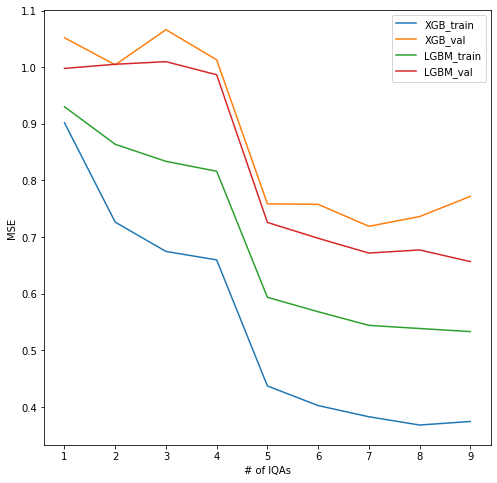

In [332]:
plt.figure(figsize=(8, 8))
plt.plot(hist_9[0], hist_9[1])
plt.plot(hist_9[0], hist_9[2])
plt.plot(hist_9[0], hist_9[3])
plt.plot(hist_9[0], hist_9[4])
plt.legend(['XGB_train', 'XGB_val', 'LGBM_train', 'LGBM_val'])
plt.xlabel('# of IQAs')
plt.ylabel('MSE')
plt.show()

In [333]:
columns = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE','DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']
hist_cor = []

for i in range(len(columns)):
    x = df[columns[:i + 1]]
    x_train = x[300:]
    x_val = x[:300]
    y_train = y[300:]
    y_val = y[:300]
    
    reg1 = XGBRegressor()
    reg2 = LGBMRegressor()

    reg1.fit(x_train, y_train)
    reg2.fit(x_train, y_train)

    pred_train1 = reg1.predict(x_train)
    pred_train2 = reg2.predict(x_train)

    pred_val1 = reg1.predict(x_val)
    pred_val2 = reg2.predict(x_val)


    result_val = pd.DataFrame({"mos": y_val, 
                               "reg1": pred_val1, 
                               "reg2": pred_val2})

    rocc_val = abs(result_val.corr(method="spearman"))
    lcc_val = abs(result_val.corr(method="pearson"))

    print(f"IQAs = {columns[:i + 1]}")
    print("XGBoost, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"]))
    print("LightGBM, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]))

    hist_cor.append([i+1, rocc_val.loc["mos", "reg1"], lcc_val.loc["mos", "reg1"], rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]])

IQAs = ['CPBD']
XGBoost, ROCC/LCC		 = 0.0860, 0.1337
LightGBM, ROCC/LCC		 = 0.0263, 0.0307
IQAs = ['CPBD', 'NIQE']
XGBoost, ROCC/LCC		 = 0.0364, 0.0577
LightGBM, ROCC/LCC		 = 0.0570, 0.0325
IQAs = ['CPBD', 'NIQE', 'BRISQUE']
XGBoost, ROCC/LCC		 = 0.0349, 0.0455
LightGBM, ROCC/LCC		 = 0.0264, 0.0287
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA']
XGBoost, ROCC/LCC		 = 0.0960, 0.0584
LightGBM, ROCC/LCC		 = 0.0484, 0.0514
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER']
XGBoost, ROCC/LCC		 = 0.4229, 0.4707
LightGBM, ROCC/LCC		 = 0.4602, 0.5022
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE']
XGBoost, ROCC/LCC		 = 0.4370, 0.4765
LightGBM, ROCC/LCC		 = 0.4865, 0.5302
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE']
XGBoost, ROCC/LCC		 = 0.4799, 0.5120
LightGBM, ROCC/LCC		 = 0.5151, 0.5553
IQAs = ['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']
XGBoost, ROCC/LCC		 = 0.4734, 0.4979
LightGBM, R

In [334]:
hist_cor = pd.DataFrame(hist_cor)

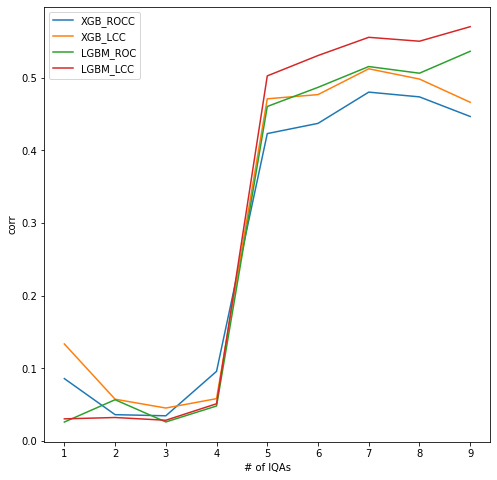

In [335]:
plt.figure(figsize=(8, 8))
plt.plot(hist_cor[0], hist_cor[1])
plt.plot(hist_cor[0], hist_cor[2])
plt.plot(hist_cor[0], hist_cor[3])
plt.plot(hist_cor[0], hist_cor[4])
plt.legend(['XGB_ROCC', 'XGB_LCC', 'LGBM_ROC', 'LGBM_LCC'])
plt.xlabel('# of IQAs')
plt.ylabel('corr')
plt.show()

#### testset 으로 data 만들기

In [26]:
face_NR =pd.read_csv("C:/Users/Home/Desktop/IQA/NRIQA_df_ffhq_all.csv")
df=face_NR

In [27]:
face_NR =pd.read_csv("C:/Users/Home/Desktop/IQA/NRIQA_df_ffhq_all.csv")
df=face_NR

In [28]:
x = df.drop(columns=['DIST_SORT', 'DIST_RATE','DIST_IMG'])
y = face_FR['WaDIQaM+VIFs+NLPD+scc+egras+DISTS+uqi+sam+mse+vifp']

In [32]:
x=x[['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']]

In [33]:

x_train = x[300:]
x_val = x[:300]
y_train = y[300:]
y_val = y[:300]

# reg1 = XGBRegressor()
LGBM_reg = LGBMRegressor()

# reg1.fit(x_train, y_train)
LGBM_reg.fit(x_train, y_train)

# pred_train1 = reg1.predict(x_train)
pred_train2 = LGBM_reg.predict(x_train)

# pred_val1 = reg1.predict(x_val)
pred_val2 = LGBM_reg.predict(x_val)

# mse_train1 = mean_squared_error(y_train, pred_train1)
# mse_val1 = mean_squared_error(y_val, pred_val1)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)

# print(f"IQAs = {columns[:i + 1]}")
# print("XGBoost, train/val\t\t = %.4f, %.4f" % (mse_train1, mse_val1))
print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

LightGBM, train/val		 = 0.5473, 0.6527


In [58]:
NR_testset_hq=pd.read_csv('C:/Users/Home/Desktop/IQA/NR_testset_hq.csv')

NR_testset_middle=pd.read_csv('C:/Users/Home/Desktop/IQA/NR_testset_middle.csv')

NR_testset_low=pd.read_csv('C:/Users/Home/Desktop/IQA/NR_testset_low.csv')

NR_testset_all=pd.read_csv('C:/Users/Home/Desktop/IQA/NR_testset_all.csv')

In [52]:
NR_testset_all=NR_testset_all[['CPBD', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID']]

In [53]:
NR_testset_all

,CPBD,BRISQUE,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID
0,0.071,48.724,28.515,38.290,44.137,27.459,65.401
1,0.090,55.511,26.866,38.343,40.939,30.512,43.843
2,0.033,57.099,33.209,38.969,48.081,30.675,59.146
3,0.540,56.827,11.879,32.192,24.894,48.398,36.710
4,0.614,56.514,12.049,46.201,13.249,13.857,33.299
...,...,...,...,...,...,...,...
995,0.138,39.468,21.051,43.257,33.068,24.834,35.244
996,0.104,35.620,35.111,49.348,38.789,39.212,86.420
997,0.060,36.593,40.958,49.014,43.411,39.458,88.952
998,0.522,73.660,45.765,24.702,41.598,35.230,53.968


In [54]:
result=LGBM_reg.predict(NR_testset_all)

In [56]:
len(result)

1000

In [59]:
NR_testset_all['NR_result']=result

In [60]:
NR_testset_all

,CPBD,BRISQUE,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DIST,NR_result
0,0.071,48.724,28.515,38.290,44.137,27.459,65.401,40.044,high,2.596959
1,0.090,55.511,26.866,38.343,40.939,30.512,43.843,45.651,high,2.581051
2,0.033,57.099,33.209,38.969,48.081,30.675,59.146,41.113,high,2.695700
3,0.540,56.827,11.879,32.192,24.894,48.398,36.710,34.088,high,2.175481
4,0.614,56.514,12.049,46.201,13.249,13.857,33.299,48.281,high,2.631702
...,...,...,...,...,...,...,...,...,...,...
995,0.138,39.468,21.051,43.257,33.068,24.834,35.244,38.987,low,2.996349
996,0.104,35.620,35.111,49.348,38.789,39.212,86.420,48.851,low,2.839739
997,0.060,36.593,40.958,49.014,43.411,39.458,88.952,48.691,low,2.881232
998,0.522,73.660,45.765,24.702,41.598,35.230,53.968,47.592,low,2.811594


In [61]:
NR_testset_all.to_csv('NR_testset_all.csv', index=False)

In [65]:
NR_testset_all[NR_testset_all['DIST']=='high']["NR_result"].mean()

2.457115173020156

In [66]:
NR_testset_all[NR_testset_all['DIST']=='middle']["NR_result"].mean()

2.506784004787536

In [67]:
NR_testset_all[NR_testset_all['DIST']=='low']["NR_result"].mean()

2.619237803556046